In [106]:
import numpy as np
import nm_lib as nm

from matplotlib import style
import matplotlib.pyplot as plt
style.use('dark_background')

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import importlib
importlib.reload(nm)

<module 'nm_lib' from '/Users/gauteholen/UiO/AST9110/nm_lib/nm_lib/nm_lib.py'>

# Stabilities and accuracy in time. 

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. Explain in physical (or mathematical) terms the solution you get. However, let's now implement a new time-step method. 

Add the following method to your library and run the previous simulation. 

$$u^{n+1}_j = \frac{1}{2}(u^n_{j+1} + u^n_{j-1}) - \frac{v \Delta t}{2 \Delta x}(u^n_{j+1} - u^n_{j-1})$$

Apply von Neumann stability analysis to the expression above. The stability condition $|\xi(k)|^2 \leq 1$ leads to the famous Courant-Friedrichs-Lewy (CFL) stability. 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Lax_uadv_burgers`. 

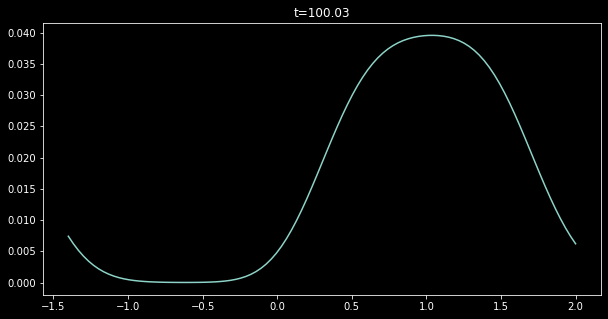

In [107]:

x0 = -1.4
xf = 2.0

nump = 100
xx = np.linspace(x0,xf,nump+1)
tf = 100
a = -1
cfl_cut = 0.98

dt = nm.cfl_adv_burger(a,xx)*cfl_cut

Nt = int(tf/dt)

def anim(ut,xx,Nt,n_frames=100, log_time = False):
    """
    animate ut(xx) in time with a limited number of timesteps
    
    Parameters
    ----------
    n_frames : `int` 
        Number of frames in the animation
    log_time : `boolean`
        if true the timestep scales logarithmic and not linearly

    Returns
    ------- 
    `HTML`
        HTML animation object
    """
    def init(): 
        axes.plot(xx,ut[0])

    def animate(i):
        axes.clear()
        axes.plot(xx,ut[i])
        axes.set_title('t=%.2f'%t[i])

    if log_time:
        frames = np.geomspace(1,Nt-1,num=n_frames, dtype=np.int64)
        
    else:
        frames = np.linspace(1,Nt-1,num=n_frames, dtype=np.int64)

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    anim = FuncAnimation(fig, animate, interval=20, frames=frames, init_func=init)
    return HTML(anim.to_jshtml())


def ut0(xx,x_c,W,A):
    return A*(np.tanh((xx+x_c)/W)-np.tanh((xx-x_c)/W))

u0 = ut0(xx,0.7,0.1,0.02)

t, ut = nm.evolv_adv_burgers(xx,u0,Nt,a,ddx=nm.deriv_dnw)

nm.anim(ut,xx,t,n_frames = 200, log_time=True)


## 1- Diffusive. 

Redo the exercise [ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and compare the two methods, i.e., one from 
[ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and the Lax-Method. 

Which one is more diffusive? Why? Rewrite Lax-method, so the right-hand side is as follows: 

$$\frac{u^{n+1}-u^{n}}{\Delta t} = ...$$

What is the reminder term look like? Is the order of convergence the same for the two methods? 

---

(\*) Equation (1) is, in fact, a shortened version of the full Burgers’ equation, which contains a viscosity term on the right-hand side, as follows:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.$$